# Capacitated Vehicle Routing Problem
<img src="https://www.researchgate.net/profile/Savvas_Pericleous/publication/319754352/figure/fig1/AS:631655517659162@1527609819407/The-Capacitated-Vehicle-Routing-Problem-CVRP.png" width="400" />

## Routing problems

I problemi di routing sono una classe di problemi della programmazione lineare che vogliono rispondere alla domanda "Qual è l'insieme di percorsi ottimale da percorrere per un gruppo di veicoli al fine di effettuare delle consegne ad un insieme di clienti?". Questo tipo di ragionamento è di fondamentale importanza per il controllo dell'approvvigionamento di beni e servizi in un sistema di distribuzione. Si stima che l'utilizzo di procedure di ottimizzazione permetta di ottenere un risparmio di costi compreso tra il 5% ed il 20%.
In particolare, andremo a trattare la variante Capacitated Vehicle Routing Problem che si occupa di minimizzare i costi di distribuzione di un determinato bene, utilizzando un numero predeterminato di veicoli con la stessa capacità, in partenza da un singolo deposito centrale. Un problema di CVRP è, dunque, composto dai seguenti elementi:

- $n$ è il numero dei clienti;
- $K$ è il numero dei veicoli;
- $N$ è l'insieme dei clienti, con $N=\{1,2,...,n\}$;
- $V$ è il set dei vertici, composto da $V=\{0\}\cup N$;
- $A$ è il set degli archi che congiungono i vertici, senza archi rientranti $A=\{(i,j)\in V^2 : i\neq j\}$;
- $c_{ij}$ è il costo di ogni arco $(i,j)\in A$;
- $Q$ è la capacità dei veicoli;
- $d_i$ è la domanda di ogni cliente $i\in N$.


### Generazione dei dati
Come primo approccio inizializziamo i dati utilizzando un numero arbitrario di clienti, stazioni e capacità dei veicoli. La domanda di ogni cliente viene generata casualmente in un range da 1 a 4.

In [1]:
import numpy as np

In [2]:
random = np.random
#random.seed(0)

In [3]:
n = 5 #numero clienti
K = 2 #numero veicoli
Q = 20 #capacità veicoli
N = [i for i in range(1, n+1)] #insieme di clienti
V = [0] + N #insieme di tutti i vertici, compreso il deposito
d = {i: random.randint(1,5) for i in N}#domanda

### Visualizzazione dei dati
Generiamo le coordinate x ed y in maniera casuale per ognuno dei vertici e le mostriamo in un grafico

In [4]:
x_coord = random.rand(len(V)) * 200
y_coord = random.rand(len(V)) * 100

In [5]:
import matplotlib.pyplot as plot

(41.87620739353814, 156.03661126184818, -0.5868965642036583, 81.40587816786852)

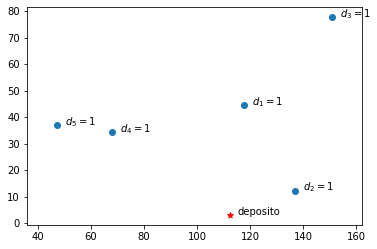

In [6]:
#scatter plot dei punti legati ai clienti
plot.scatter(x_coord[1:], y_coord[1:], c='#1f77b4')
for i in N:
    plot.annotate('$d_%d=%d$' % (i, d[i]), (x_coord[i]+3, y_coord[i]))

#scatter plot del deposito
plot.scatter(x_coord[0], y_coord[0], c='red', marker='*')
plot.annotate('deposito', (x_coord[0]+3, y_coord[0]))

#per evitare che le etichette escano dal margine
#plot.xlim(0, 120)
#plot.ylim(0, 120)
plot.axis('equal')

Generiamo l'insieme A che conterrà gli archi che collegano i nodi. Il grafo che rappresenta i nodi e gli archi è un grafo completo senza archi rientranti.
Il costo di un arco congiungente due punti sarà dato dalla distanza euclidea tra i punti

In [7]:
#insieme di archi che connettono tutti i nodi (senza archi rientranti sullo stesso nodo)
A = [(i, j) for i in V for j in V if i != j]

#arco ha costo dato dalla distanza euclidea dei due vertici
costo = {(i, j): np.sqrt((x_coord[j] - x_coord[i])**2 + (y_coord[j] - y_coord[i])**2) for i, j in A}

### Impostazione del problema
La funzione obiettivo avrà la seguente forma:
\begin{align}
\quad (1) \min & \sum_{i\in V} \sum_{j\in V} c_{ij} x_{ij} \\
\end{align}
Questa funzione vuole minimizzare il prodotto tra costo di un certo arco, dato in questo caso dalla distanza euclidea tra i due punti, e la variabile  $x_{ij}$ di che assumerà il valore 0 se l'arco non viene percorso, oppure 1 se viene percorso.

Soggetta ai vincoli:
\begin{align}
\quad (2) & \sum_{i\in V} x_{ij} = 1  && j \in N \\
(3) & \sum_{j\in V } x_{ij} = 1 && i \in N \\
(4) & \sum_{i\in V } x_{i0} = K &&\\
(5) & \sum_{j\in V } x_{0j} = K &&\\
(6) & x_{ij} \in \{0,1 \} \forall i,j \in V\\
\end{align}

- I vincoli (2) e (3) vengono detti vincoli di grado entrante e di grado uscente ed impongono che esattamente un arco esca ed entri ogni vertice associato ad un cliente;
- I vincoli (4) e (5) riguardano il grado in uscita ed in entrata del deposito ed impongono che escano ed entrino esattamente K mezzi dal nodo che rappresenta il deposito;
- Il vincolo (6) impone che i valori degli archi siano uguali a 0 o ad 1.

#### Miller, Tucker e Zemlin
Un'alternativa ai cosiddetti $\textit{capacity-cut constraints}$ (CCCs) è rappresentata dai vincoli proposti da Miller, Tucker e Zemlin. Questi vincoli avranno la forma:

\begin{align}
\quad
(7) & u_i - u_j + Qx_{ij}\leq Q - d_j && \forall i,j \in V \setminus \{0 \}, i \neq j\\
(8) & d_i \leq u_i \leq Q && \forall i \in V \setminus \{0\}
\end{align}

- Il vincolo (7) introduce una nuova variabile chiamata $u_i$, che rappresenta il carico di un veicolo dopo aver visitato il cliente i-esimo. Per quanto riguarda questo vincolo si possono distinguere due casi:
    - $x_{ij}$ = 0, cioè nessun veicolo si muove dal nodo i al nodo j utilizzando l'arco (i,j); in questo caso $u_i - u_j \leq Q - d_j$ è sempre vero dato che, per vincolo (8), $u_i  \leq Q $ e $u_j \geq d_j$. Dunque se $x_{i,j} = 0$ il vincolo è ridondante.
    - $x_{i,j} = 1$, cioè un veicolo si muove dal nodo i al nodo j utilizzando l'arco (i,j): in questo caso $u_i \geq u_i + d_j $ 
- Il vincolo (8) impone che il carico di un veicolo deve essere almeno equivalente a $d_i $ senza superare la capacità del veicolo

Questi vincoli hanno cardinalità polinomiale, al contrario dei CCCs che hanno una cardinalità esponenziale rispetto ad n.

In [8]:
import setup
from docplex.mp.model import Model

In [9]:
#!pip install docplex
#from docplex.mp.model import Model

In [10]:
mdl = Model('CVRP Random')

In [11]:
x = mdl.binary_var_dict(A, name='x') #insieme delle variabili decisionali per gli archi
u = mdl.continuous_var_dict(N, ub=Q, name='u') #domanda cumulativa, upper bound di Q ci assicura che non si vada oltre la capacità di ogni mezzo

In [12]:
#(1)
mdl.minimize(mdl.sum(costo[i,j]*x[i,j] for i in V for j in V if i != j))

#Vincoli
#(2) e (3) Il primo vincolo ci dice che esattamente un arco entra e esce da ogni vertice associato ad un cliente
mdl.add_constraints(mdl.sum(x[i, j] for j in V if j != i) == 1 for i in N)
mdl.add_constraints(mdl.sum(x[i, j] for i in V if i != j) == 1 for j in N)

[docplex.mp.LinearConstraint[](x_0_1+x_2_1+x_3_1+x_4_1+x_5_1,EQ,1),
 docplex.mp.LinearConstraint[](x_0_2+x_1_2+x_3_2+x_4_2+x_5_2,EQ,1),
 docplex.mp.LinearConstraint[](x_0_3+x_1_3+x_2_3+x_4_3+x_5_3,EQ,1),
 docplex.mp.LinearConstraint[](x_0_4+x_1_4+x_2_4+x_3_4+x_5_4,EQ,1),
 docplex.mp.LinearConstraint[](x_0_5+x_1_5+x_2_5+x_3_5+x_4_5,EQ,1)]

In [13]:
#(4) e (5)
#Le condizioni i e k != 0 sono necessarie perché non esistono archi rientranti
mdl.add_constraint(mdl.sum(x[0,j] for j in N) == K)
mdl.add_constraint(mdl.sum(x[i,0] for i in N) == K)

#(6) non è modellato perché già inserito nella definizione della variabile x come variabile binaria

docplex.mp.LinearConstraint[](x_1_0+x_2_0+x_3_0+x_4_0+x_5_0,EQ,2)

In [14]:
#(7)
mdl.add_constraints((u[i] - u[j] + (Q*x[i,j]) <= Q - d[j]) for i in N for j in N if i!=j)

[docplex.mp.LinearConstraint[](20x_1_2+u_1-u_2,LE,19),
 docplex.mp.LinearConstraint[](20x_1_3+u_1-u_3,LE,19),
 docplex.mp.LinearConstraint[](20x_1_4+u_1-u_4,LE,19),
 docplex.mp.LinearConstraint[](20x_1_5+u_1-u_5,LE,19),
 docplex.mp.LinearConstraint[](20x_2_1-u_1+u_2,LE,19),
 docplex.mp.LinearConstraint[](20x_2_3+u_2-u_3,LE,19),
 docplex.mp.LinearConstraint[](20x_2_4+u_2-u_4,LE,19),
 docplex.mp.LinearConstraint[](20x_2_5+u_2-u_5,LE,19),
 docplex.mp.LinearConstraint[](20x_3_1-u_1+u_3,LE,19),
 docplex.mp.LinearConstraint[](20x_3_2-u_2+u_3,LE,19),
 docplex.mp.LinearConstraint[](20x_3_4+u_3-u_4,LE,19),
 docplex.mp.LinearConstraint[](20x_3_5+u_3-u_5,LE,19),
 docplex.mp.LinearConstraint[](20x_4_1-u_1+u_4,LE,19),
 docplex.mp.LinearConstraint[](20x_4_2-u_2+u_4,LE,19),
 docplex.mp.LinearConstraint[](20x_4_3-u_3+u_4,LE,19),
 docplex.mp.LinearConstraint[](20x_4_5+u_4-u_5,LE,19),
 docplex.mp.LinearConstraint[](20x_5_1-u_1+u_5,LE,19),
 docplex.mp.LinearConstraint[](20x_5_2-u_2+u_5,LE,19),
 docplex.m

In [15]:
#(8) La seconda parte dell'uguaglianza è già inclusa nell'upper bound della variabile u
mdl.add_constraints(u[i] >= d[i] for i in N)

[docplex.mp.LinearConstraint[](u_1,GE,1),
 docplex.mp.LinearConstraint[](u_2,GE,1),
 docplex.mp.LinearConstraint[](u_3,GE,1),
 docplex.mp.LinearConstraint[](u_4,GE,1),
 docplex.mp.LinearConstraint[](u_5,GE,1)]

In [16]:
#Impostazione di un limite di tempo di un'ora
mdl.parameters.timelimit = (60*60)

In [17]:
s = mdl.solve(log_output=True)

Version identifier: 12.10.0.0 | 2019-11-26 | 843d4de2ae
CPXPARAM_Read_DataCheck                          1
CPXPARAM_RandomSeed                              201903125
CPXPARAM_TimeLimit                               3600
Tried aggregator 1 time.
MIP Presolve eliminated 5 rows and 0 columns.
Reduced MIP has 32 rows, 35 columns, and 120 nonzeros.
Reduced MIP has 30 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (0.06 ticks)
Found incumbent of value 401.481745 after 0.00 sec. (0.17 ticks)
Probing time = 0.00 sec. (0.03 ticks)
Tried aggregator 1 time.
Detecting symmetries...
Reduced MIP has 32 rows, 35 columns, and 120 nonzeros.
Reduced MIP has 30 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (0.08 ticks)
Probing time = 0.00 sec. (0.04 ticks)
Clique table members: 20.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 8 threads.
Root relaxation solution time = 0

In [18]:
print(s)

solution for: CVRP Random
objective: 328.177
x_0_2=1
x_0_4=1
x_1_0=1
x_2_0=1
x_3_1=1
x_4_5=1
x_5_3=1
u_1=4.000
u_2=1.000
u_3=3.000
u_4=1.000
u_5=2.000



In [19]:
print(s.solve_status)

JobSolveStatus.OPTIMAL_SOLUTION


In [20]:
print(s.solve_details)

status  = integer optimal solution
time    = 0.047 s.
problem = MILP
gap     = 0%



In [21]:
collegamenti = [a for a in A if x[a].solution_value == 1]

Text(115.2549597709442, 3.140047741799623, 'deposito')

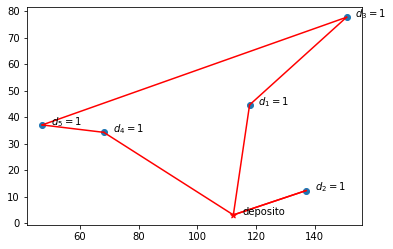

In [22]:
plot.scatter(x_coord[1:], y_coord[1:], c='#1f77b4')
for i in N:
    plot.annotate('$d_%d=%d$' % (i, d[i]), (x_coord[i]+3, y_coord[i]))

for i, j in collegamenti:
    plot.plot([x_coord[i], x_coord[j]], [y_coord[i], y_coord[j]], c='r')
    
#scatter plot del deposito
plot.scatter(x_coord[0], y_coord[0], c='red', marker='*')
plot.annotate('deposito', (x_coord[0]+3, y_coord[0]))

### Testing con datasets reali
Per i test sono stati utilizzate le istanze di Christofides, Mingozzi e Toth, 14 dataset di dimensioni comprese tra i 50 ed i 199 nodi.
I datasets contengono:
- Numero di clienti, capacità dei veicoli;
- Per quanto riguarda il deposito, coordinate x ed y;
- Per ogni cliente, coordinate x ed y e domanda.

<table class="tg">
    <caption>Composizione dei datasets</caption>
<thead>
  <tr>
    <th class="tg-0pky">Dataset</th>
    <th class="tg-0pky">Numero clienti</th>
    <th class="tg-0pky">Posizionamento dei clienti</th>
    <th class="tg-0lax">Capacità veicolo</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky">1</td>
    <td class="tg-0pky">50</td>
    <td class="tg-0pky">Casuale</td>
    <td class="tg-0lax">160</td>
  </tr>
  <tr>
    <td class="tg-0pky">2</td>
    <td class="tg-0pky">75</td>
    <td class="tg-0pky">Casuale</td>
    <td class="tg-0lax">140</td>
  </tr>
  <tr>
    <td class="tg-0pky">3</td>
    <td class="tg-0pky">100</td>
    <td class="tg-0pky">Casuale</td>
    <td class="tg-0lax">200</td>
  </tr>
  <tr>
    <td class="tg-0pky">4</td>
    <td class="tg-0pky">150</td>
    <td class="tg-0pky">Casuale</td>
    <td class="tg-0lax">200</td>
  </tr>
  <tr>
    <td class="tg-0pky">5</td>
    <td class="tg-0pky">199</td>
    <td class="tg-0pky">Casuale</td>
    <td class="tg-0lax">200</td>
  </tr>
  <tr>
    <td class="tg-0pky">6</td>
    <td class="tg-0pky">50</td>
    <td class="tg-0pky">Casuale</td>
    <td class="tg-0lax">160</td>
  </tr>
  <tr>
    <td class="tg-0pky">7</td>
    <td class="tg-0pky">75</td>
    <td class="tg-0pky">Casuale</td>
    <td class="tg-0lax">140</td>
  </tr>
  <tr>
    <td class="tg-0pky">8</td>
    <td class="tg-0pky">100</td>
    <td class="tg-0pky">Casuale</td>
    <td class="tg-0lax">200</td>
  </tr>
  <tr>
    <td class="tg-0pky">9</td>
    <td class="tg-0pky">150</td>
    <td class="tg-0pky">Casuale</td>
    <td class="tg-0lax">200</td>
  </tr>
  <tr>
    <td class="tg-0pky">10</td>
    <td class="tg-0pky">199</td>
    <td class="tg-0pky">Casuale</td>
    <td class="tg-0lax">200</td>
  </tr>
  <tr>
    <td class="tg-0pky">11</td>
    <td class="tg-0pky">120</td>
    <td class="tg-0pky">Clusterizzato</td>
    <td class="tg-0lax">200</td>
  </tr>
  <tr>
    <td class="tg-0pky">12</td>
    <td class="tg-0pky">100</td>
    <td class="tg-0pky">Clusterizzato</td>
    <td class="tg-0lax">200</td>
  </tr>
  <tr>
    <td class="tg-0pky">13</td>
    <td class="tg-0pky">120</td>
    <td class="tg-0pky">Clusterizzato</td>
    <td class="tg-0lax">200</td>
  </tr>
  <tr>
    <td class="tg-0pky">14</td>
    <td class="tg-0pky">100</td>
    <td class="tg-0pky">Clusterizzato</td>
    <td class="tg-0lax">200</td>
  </tr>
</tbody>
</table>

Tra i dati forniti non era presente il numero di veicoli utilizzati. Si è quindi deciso di fare dei test su un dataset di dimensioni ridotte (ottenuto tenendo solo le prime 20 righe del dataset 1) per decidere quale valore usare come parametro K. I test utilizzano un numero variabile dei veicoli, utilizzando come limite inferiore il quantitativo minimo di veicoli necessari a soddisfare la domanda dei clienti (dato dal rapporto tra la somma delle domande dei singoli clienti e la capacità di ogni veicolo) e come limite superiore il numero dei clienti (per evitare che non venisse soddisfatta la combinazione dei vincoli 2, 3, 4 e 5).

Dopo i test effettuati si è visto che, al crescere di K, si vedeva una crescita anche della funzione obiettivo. Si è quindi deciso di utilizzare come K il minimo numero di veicoli necessari per soddisfare la domanda dei clienti.

<table class="tg">
      <caption>Risultati dei test valore K</caption>
<thead>
  <tr>
    <th class="tg-0pky">K</th>
    <th class="tg-0pky">Funzione obiettivo</th>
    <th class="tg-0pky"></th>
    <th class="tg-0pky"></th>
    <th class="tg-0pky"></th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky">Kmin</td>
    <td class="tg-0pky">258.855</td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">Kmin+2</td>
    <td class="tg-0pky">283.766</td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">Kmin+4</td>
    <td class="tg-0pky">320.901</td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0lax">Kmin+6</td>
    <td class="tg-0lax">366.636</td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
  </tr>
</tbody>
</table>

Una volta fissato il numero di K, il modello è stato applicato ad ognuno dei 14 dataset con un tempo di esecuzione di un'ora. I risultati di questi test sono riassunti nella tabella successiva:

<table class="tg">
      <caption>Risultato dei test sulle istanze di Christofides, Mingozzi e Toth</caption>
<thead>
  <tr>
    <th class="tg-0pky">Dataset</th>
    <th class="tg-0pky">Numero clienti</th>
    <th class="tg-0pky">Tempo (s)</th>
    <th class="tg-0pky">Funzione obiettivo</th>
    <th class="tg-0pky">Gap</th>
    <th class="tg-0pky"></th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky">1</td>
    <td class="tg-0pky">50</td>
    <td class="tg-0pky">3600</td>
    <td class="tg-0pky">551.44</td>
    <td class="tg-0pky">14%</td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">2</td>
    <td class="tg-0pky">75</td>
    <td class="tg-0pky">3600</td>
    <td class="tg-0pky">1070</td>
    <td class="tg-0pky">39.17%</td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">3</td>
    <td class="tg-0pky">100</td>
    <td class="tg-0pky">3600</td>
    <td class="tg-0pky">954.365</td>
    <td class="tg-0pky">24.52%</td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">4</td>
    <td class="tg-0pky">150</td>
    <td class="tg-0pky">3600</td>
    <td class="tg-0pky">2031.18</td>
    <td class="tg-0pky">59%</td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">5</td>
    <td class="tg-0pky">199</td>
    <td class="tg-0pky">3600</td>
    <td class="tg-0pky" colspan="2">nessuna soluzione trovata</td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">6</td>
    <td class="tg-0pky">50</td>
    <td class="tg-0pky">3600</td>
    <td class="tg-0pky">564.212<br></td>
    <td class="tg-0pky">16.69%</td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">7</td>
    <td class="tg-0pky">75</td>
    <td class="tg-0pky">3600</td>
    <td class="tg-0pky">1075.75</td>
    <td class="tg-0pky">39.62%</td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">8</td>
    <td class="tg-0pky">100</td>
    <td class="tg-0pky">3600</td>
    <td class="tg-0pky">964.062</td>
    <td class="tg-0pky">25.30%</td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">9</td>
    <td class="tg-0pky">150</td>
    <td class="tg-0pky">3600</td>
    <td class="tg-0pky">2311.19</td>
    <td class="tg-0pky">64.06%</td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">10</td>
    <td class="tg-0pky">199</td>
    <td class="tg-0pky">3600</td>
    <td class="tg-0pky" colspan="2">nessuna soluzione trovata</td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">11</td>
    <td class="tg-0pky">120</td>
    <td class="tg-0pky">3600</td>
    <td class="tg-0pky">1354.88</td>
    <td class="tg-0pky">64.69%</td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">12</td>
    <td class="tg-0pky">100</td>
    <td class="tg-0pky">3600</td>
    <td class="tg-0pky">921.342</td>
    <td class="tg-0pky">35.48%</td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">13</td>
    <td class="tg-0pky">120</td>
    <td class="tg-0pky">3600</td>
    <td class="tg-0pky">1344.13</td>
    <td class="tg-0pky">64.43%</td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">14</td>
    <td class="tg-0pky">100</td>
    <td class="tg-0pky">3600</td>
    <td class="tg-0pky">945.171</td>
    <td class="tg-0pky">37.44%</td>
    <td class="tg-0pky"></td>
  </tr>
</tbody>
</table>

Come si può vedere dalla tabella, nonostante la complessità polinomiale dei vincoli di Miller Tucker e Zemlin, in nessuno dei casi si è riusciti ad arrivare ad una soluzione ottimale nel limite imposto di un'ora, con un gap che va dal 16% circa nel dataset più piccolo, fino ad arrivare a non trovare nessuna soluzione per i dataset numero 5 e 10 che sono composti da 199 clienti. Sarebbe dunqune interessante testare se aumentando i limiti di tempo si potrebbe arrivare ad una soluzione ottimale o, nel caso dei dataset più grandi, ad una soluzione. 

In [101]:
dataset = 'vrpnc' + '_test' + '.txt'

In [102]:
x_coord = []
y_coord = []
d = {}
with open(dataset) as f:
    lines = f.readlines()
    i = 0
    #print(len(lines))
    for line in lines:
        l = line.split()
        if(i == 0):
            n = int(l[0]) #numero clienti
            Q = int(l[1]) #capacità veicoli
        else:
            x_coord.append(int(l[0]))
            y_coord.append(int(l[1]))
            if(len(l) > 2):
                d[i-1] = int(l[2])#Domanda
        i = i+1
    n = len(lines)-2 #Ogni riga del file di testo, ad esclusione delle 2 iniziali, contiene un cliente
    N = [i for i in range(1, n+1)]
    V = [0] + N #Insieme di tutti i vertici, compreso il deposito

f.close()

D = sum(d.values()) #domanda complessiva
rapp = D/Q
if rapp.is_integer():
    Kmin = int(D/Q)
else:
    Kmin = int(D/Q) + 1
Kmax = n

#insieme di archi che connettono tutti i nodi (senza archi rientranti sullo stesso nodo)
A = [(i, j) for i in V for j in V if i != j]

#arco ha costo dato dalla distanza euclidea dei due vertici
costo = {(i, j): np.sqrt((x_coord[j] - x_coord[i])**2 + (y_coord[j] - y_coord[i])**2) for i, j in A}